<a href="https://colab.research.google.com/github/shlokshukla200/ML-Capstone_Project/blob/main/Machine_Learning_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                              **Salary Prediction for Company X**

---

### **Problem Statement**: Design a model that predicts the salary to be offered to an employee, using historical data, to minimize human bias and ensure salary equity for employees with similar profiles.

## Exploratory Data Analysis (EDA):

### Importing the Libraries

In [31]:
import numpy as np                    #For Numerical Calculations
import pandas as pd                   #For Data Manipulation
import matplotlib.pyplot as plt       #For Data Visualisation
import seaborn as sns                 #For Enchanced Data Visualisation
import math
import sklearn                        #For Machine Learning Algorithms
import warnings                       #To Hide the Warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

### Opening the CSV

In [32]:
url= 'https://raw.githubusercontent.com/shlokshukla200/Capstone-Project/refs/heads/main/expected_ctc.csv'

df=pd.read_csv(url)

In [33]:
df.head(10)       #Shows first-10 rows of dataset

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390
5,6,30564,16,3,Top Management,Area Sales Manager,Retail,G,Director,Doctorate,...,Pune,Bhubaneswar,3511167,Y,C,5,4,0,0,4522383
6,7,27267,1,1,Engineering,Team Lead,FMCG,L,Marketing Manager,Grad,...,Delhi,Pune,492917,Y,B,3,3,0,0,630933
7,8,36521,19,11,Others,Analyst,Others,E,Manager,PG,...,Surat,Bangalore,2693459,N,C,6,1,1,0,3221376
8,9,11616,8,7,Analytics/BI,Others,Telecom,L,Marketing Manager,Doctorate,...,Nagpur,Guwahati,1630225,N,A,6,6,0,0,2288835
9,10,43886,15,15,Analytics/BI,CEO,Telecom,M,Product Manager,Doctorate,...,Bangalore,Bhubaneswar,1761797,Y,A,5,6,0,1,2466515


In [34]:
df.describe()       #Shows the statistical info

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
count,25000.000000,25000.000000,25000.000000,25000.000000,18820.000000,17308.000000,13119.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04
mean,12500.500000,34993.240080,12.493080,6.258200,2002.193624,2005.153571,2007.396372,1.760945e+06,3.482040,4.089040,0.773680,0.081720,2.250155e+06
std,7217.022701,14390.271591,7.471398,5.819513,8.316640,9.022963,7.493601,9.202125e+05,1.690335,2.606612,1.199449,0.273943,1.160480e+06
min,1.000000,10000.000000,0.000000,0.000000,1986.000000,1988.000000,1995.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.037440e+05
25%,6250.750000,22563.750000,6.000000,1.000000,1996.000000,1997.000000,2001.000000,1.027312e+06,2.000000,2.000000,0.000000,0.000000,1.306278e+06
50%,12500.500000,34974.500000,12.000000,5.000000,2002.000000,2006.000000,2007.000000,1.802568e+06,3.000000,4.000000,0.000000,0.000000,2.252136e+06
75%,18750.250000,47419.000000,19.000000,10.000000,2009.000000,2012.000000,2014.000000,2.443883e+06,5.000000,6.000000,1.000000,0.000000,3.051354e+06
max,25000.000000,60000.000000,25.000000,25.000000,2020.000000,2023.000000,2020.000000,3.999693e+06,6.000000,8.000000,5.000000,1.000000,5.599570e+06


In [35]:
df.info()       #Shows information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [36]:
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
print("Numeric columns:", numeric_columns)

Numeric columns: ['IDX', 'Applicant_ID', 'Total_Experience', 'Total_Experience_in_field_applied', 'Passing_Year_Of_Graduation', 'Passing_Year_Of_PG', 'Passing_Year_Of_PHD', 'Current_CTC', 'No_Of_Companies_worked', 'Number_of_Publications', 'Certifications', 'International_degree_any', 'Expected_CTC']


In [37]:
print("Number of Rows and Columns is:",df.shape) #Number Of Rows and Columns

Number of Rows and Columns is: (25000, 29)


In [38]:
print("The Columns in the Dataset are:",df.columns) #Name of Columns

The Columns in the Dataset are: Index(['IDX', 'Applicant_ID', 'Total_Experience',
       'Total_Experience_in_field_applied', 'Department', 'Role', 'Industry',
       'Organization', 'Designation', 'Education', 'Graduation_Specialization',
       'University_Grad', 'Passing_Year_Of_Graduation', 'PG_Specialization',
       'University_PG', 'Passing_Year_Of_PG', 'PHD_Specialization',
       'University_PHD', 'Passing_Year_Of_PHD', 'Curent_Location',
       'Preferred_location', 'Current_CTC', 'Inhand_Offer',
       'Last_Appraisal_Rating', 'No_Of_Companies_worked',
       'Number_of_Publications', 'Certifications', 'International_degree_any',
       'Expected_CTC'],
      dtype='object')


###Droping the Columns which are less usefull

In [39]:
df.drop(['IDX', 'Applicant_ID'], axis=1, inplace=True)

###Checking For Duplicates

In [40]:
df.nunique()

,0
Total_Experience,26
Total_Experience_in_field_applied,26
Department,12
Role,24
Industry,11
Organization,16
Designation,18
Education,4
Graduation_Specialization,11
University_Grad,13


###Checking for Null Values

In [41]:
df.isnull().sum()

,0
Total_Experience,0
Total_Experience_in_field_applied,0
Department,2778
Role,963
Industry,908
Organization,908
Designation,3129
Education,0
Graduation_Specialization,6180
University_Grad,6180


### Handelling the Missing Values

In [42]:
#Replacing the Numerical Values with their Median

df['Passing_Year_Of_Graduation'] = df['Passing_Year_Of_Graduation'].fillna(df['Passing_Year_Of_Graduation'].median())
df['Passing_Year_Of_PG'] = df['Passing_Year_Of_PG'].fillna(df['Passing_Year_Of_PG'].median())
df['Passing_Year_Of_PHD'] = df['Passing_Year_Of_PHD'].fillna(df['Passing_Year_Of_PHD'].median())


#Replacing the Categorical Values with their Mode

df['Department'] = df['Department'].fillna(df['Department'].mode()[0])
df['Role'] = df['Role'].fillna(df['Role'].mode()[0])
df['Industry'] = df['Industry'].fillna(df['Industry'].mode()[0])
df['Organization'] = df['Organization'].fillna(df['Organization'].mode()[0])
df['Designation'] = df['Designation'].fillna(df['Designation'].mode()[0])
df['Graduation_Specialization'] = df['Graduation_Specialization'].fillna(df['Graduation_Specialization'].mode()[0])
df['University_Grad'] = df['University_Grad'].fillna(df['University_Grad'].mode()[0])
df['PG_Specialization'] = df['PG_Specialization'].fillna(df['PG_Specialization'].mode()[0])
df['University_PG'] = df['University_PG'].fillna(df['University_PG'].mode()[0])
df['PHD_Specialization'] = df['PHD_Specialization'].fillna(df['PHD_Specialization'].mode()[0])
df['University_PHD'] = df['University_PHD'].fillna(df['University_PHD'].mode()[0])
df['Last_Appraisal_Rating'] = df['Last_Appraisal_Rating'].fillna(df['Last_Appraisal_Rating'].mode()[0])

## Checking For Outliers

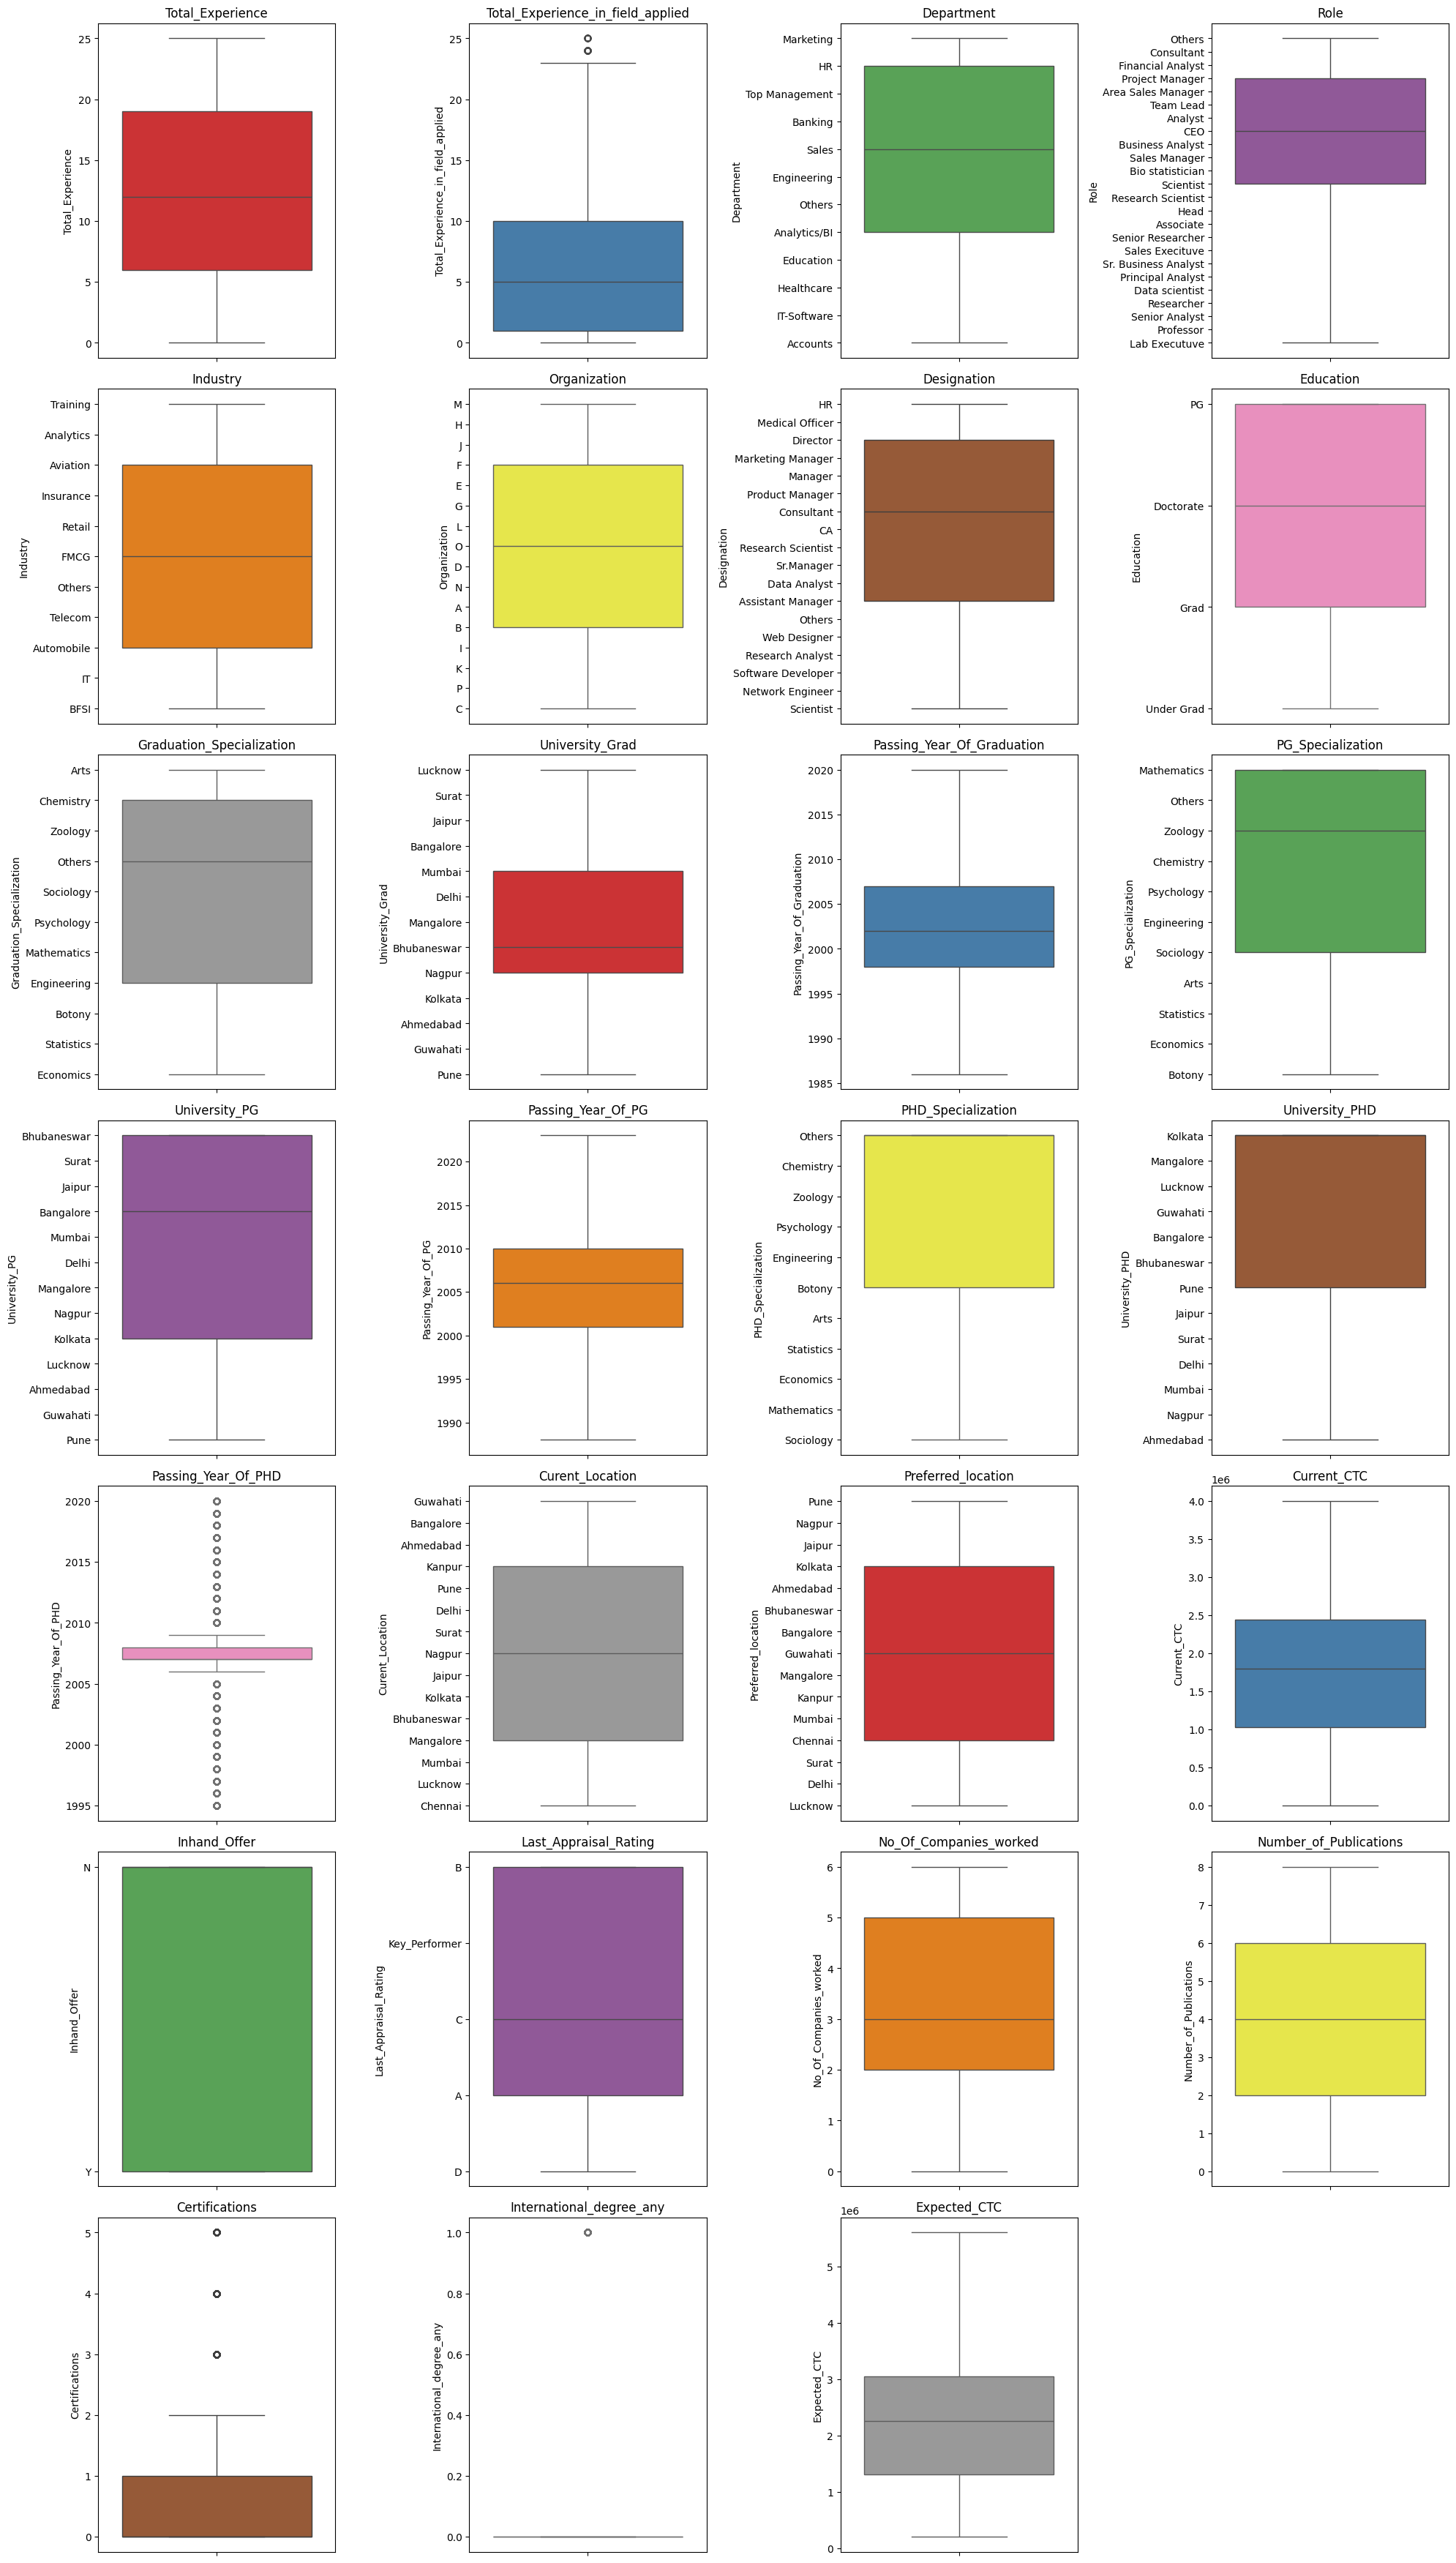

In [43]:
columns = df.columns

cols = len(columns) #Showing 4 Plots in a Row
rows = (cols + 3)

plt.figure(figsize=(20, rows * 5))

Colour = sns.color_palette("Set1", cols)

for i, col in enumerate(columns):
    plt.subplot(rows, 4, i + 1)

    sns.boxplot(y=df[col], color=Colour[i])
    plt.title(col)

plt.tight_layout()
plt.show()

### Outliers Treatment

In [44]:
def remove_outlier (col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1                         #Defining the Inter-Quantile Range
  lr=Q1-(1.5*IQR)
  ur=Q3+(1.5*IQR)
  return  lr,ur

### Outliers Treatment

As we can see there are some outliers in Total_Experience_in_field_applied, Passing_Year_Of_PHD,Certifications, International_degree_any, So in this section we will treat them

In [45]:
lrTotal_Experience_in_field_applied,urTotal_Experience_in_field_applied=remove_outlier(df['Total_Experience_in_field_applied'])
lrPassing_Year_Of_PHD,urPassing_Year_Of_PHD=remove_outlier(df['Passing_Year_Of_PHD'])
lrCertifications,urCertifications=remove_outlier(df['Certifications'])
lrInternational_degree_any,urInternational_degree_any=remove_outlier(df['International_degree_any'])


df['Total_Experience_in_field_applied']=np.where(df['Total_Experience_in_field_applied']<lrTotal_Experience_in_field_applied,lrTotal_Experience_in_field_applied,df['Total_Experience_in_field_applied'])
df['Total_Experience_in_field_applied']=np.where(df['Total_Experience_in_field_applied']>urTotal_Experience_in_field_applied,urTotal_Experience_in_field_applied,df['Total_Experience_in_field_applied'])


df['Passing_Year_Of_PHD']=np.where(df['Passing_Year_Of_PHD']<lrPassing_Year_Of_PHD,lrPassing_Year_Of_PHD,df['Passing_Year_Of_PHD'])
df['Passing_Year_Of_PHD']=np.where(df['Passing_Year_Of_PHD']>urPassing_Year_Of_PHD,urPassing_Year_Of_PHD,df['Passing_Year_Of_PHD'])


df['Certifications']=np.where(df['Certifications']<lrCertifications,lrCertifications,df['Certifications'])
df['Certifications']=np.where(df['Certifications']>urCertifications,urCertifications,df['Certifications'])


df['International_degree_any']=np.where(df['International_degree_any']<lrInternational_degree_any,lrInternational_degree_any,df['International_degree_any'])
df['International_degree_any']=np.where(df['International_degree_any']>urInternational_degree_any,urInternational_degree_any,df['International_degree_any'])

##Univariate Analysis

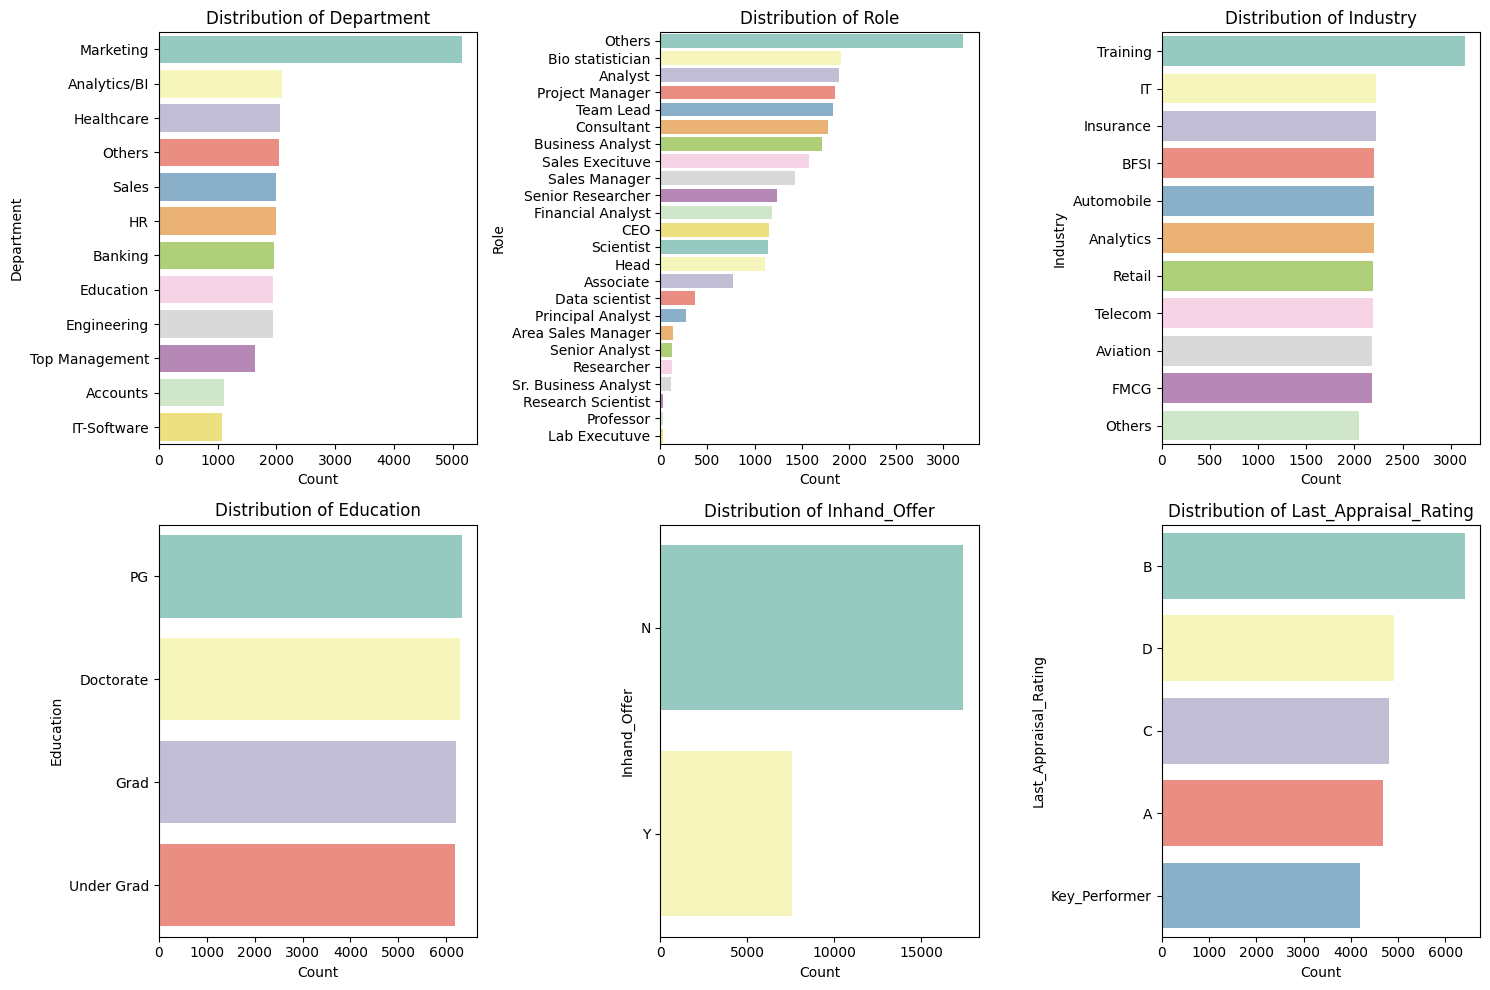

In [46]:
#Bar graph
# Select some categorical columns for plotting
categorical_cols = ['Department', 'Role', 'Industry', 'Education', 'Inhand_Offer', 'Last_Appraisal_Rating']

# Determine the number of rows and columns for subplots
n_cols = 3 # Number of columns
n_rows = math.ceil(len(categorical_cols) / n_cols) # Calculate rows needed

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Generate bar plots for categorical columns
for i, col in enumerate(categorical_cols):
    sns.countplot(y=col, data=df, order = df[col].value_counts().index, palette='Set3', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

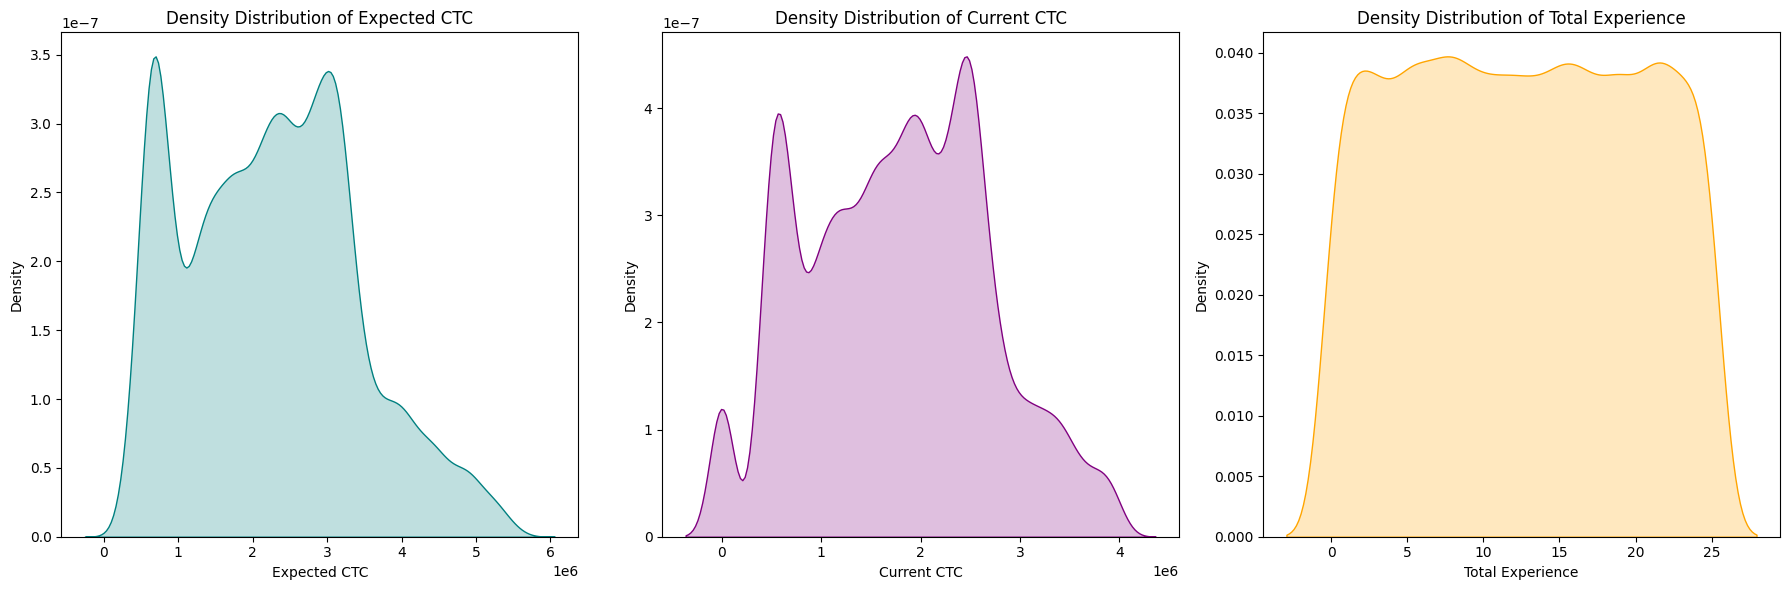

In [47]:
#KDEplot
#Create a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualize the density distribution of Expected_CTC
sns.kdeplot(df['Expected_CTC'], fill=True, color='teal', ax=axes[0])
axes[0].set_title('Density Distribution of Expected CTC')
axes[0].set_xlabel('Expected CTC')
axes[0].set_ylabel('Density')

# Visualize the density distribution of Current_CTC
sns.kdeplot(df['Current_CTC'], fill=True, color='purple', ax=axes[1])
axes[1].set_title('Density Distribution of Current CTC')
axes[1].set_xlabel('Current CTC')
axes[1].set_ylabel('Density')

# Visualize the density distribution of Total_Experience
sns.kdeplot(df['Total_Experience'], fill=True, color='orange', ax=axes[2])
axes[2].set_title('Density Distribution of Total Experience')
axes[2].set_xlabel('Total Experience')
axes[2].set_ylabel('Density')


plt.tight_layout()
plt.show()

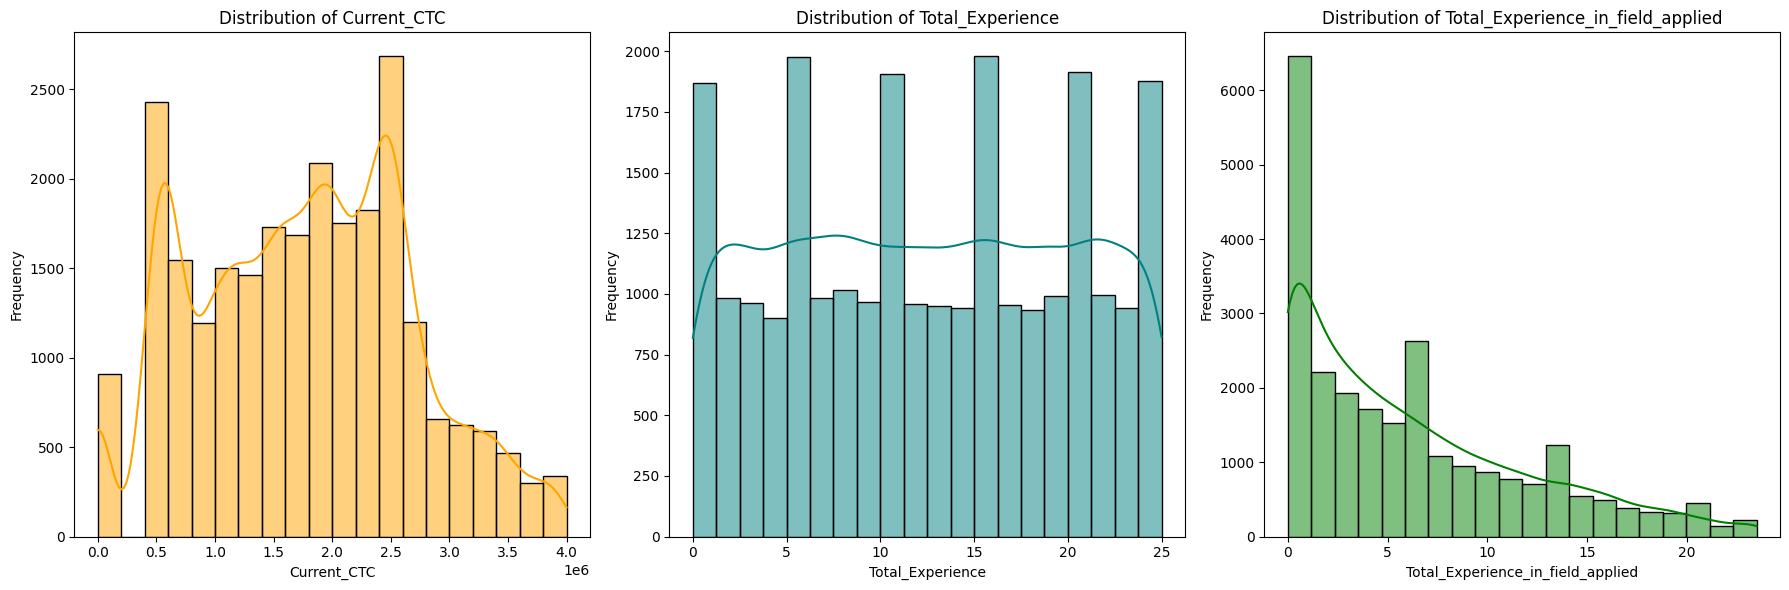

In [48]:
#Histplot
# Create a figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Visualize the distribution of Current_CTC
sns.histplot(df['Current_CTC'], bins=20, kde=True, color='orange', ax=axes[0])
axes[0].set_title('Distribution of Current_CTC')
axes[0].set_xlabel('Current_CTC')
axes[0].set_ylabel('Frequency')

# Visualize the distribution of Total_Experience
sns.histplot(df['Total_Experience'], bins=20, kde=True, color='teal', ax=axes[1])
axes[1].set_title('Distribution of Total_Experience')
axes[1].set_xlabel('Total_Experience')
axes[1].set_ylabel('Frequency')

# Visualize the distribution of Total_Experience_in_field_applied
sns.histplot(df['Total_Experience_in_field_applied'], bins=20, kde=True, color='green', ax=axes[2])
axes[2].set_title('Distribution of Total_Experience_in_field_applied')
axes[2].set_xlabel('Total_Experience_in_field_applied')
axes[2].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

##Bivariate Analysis

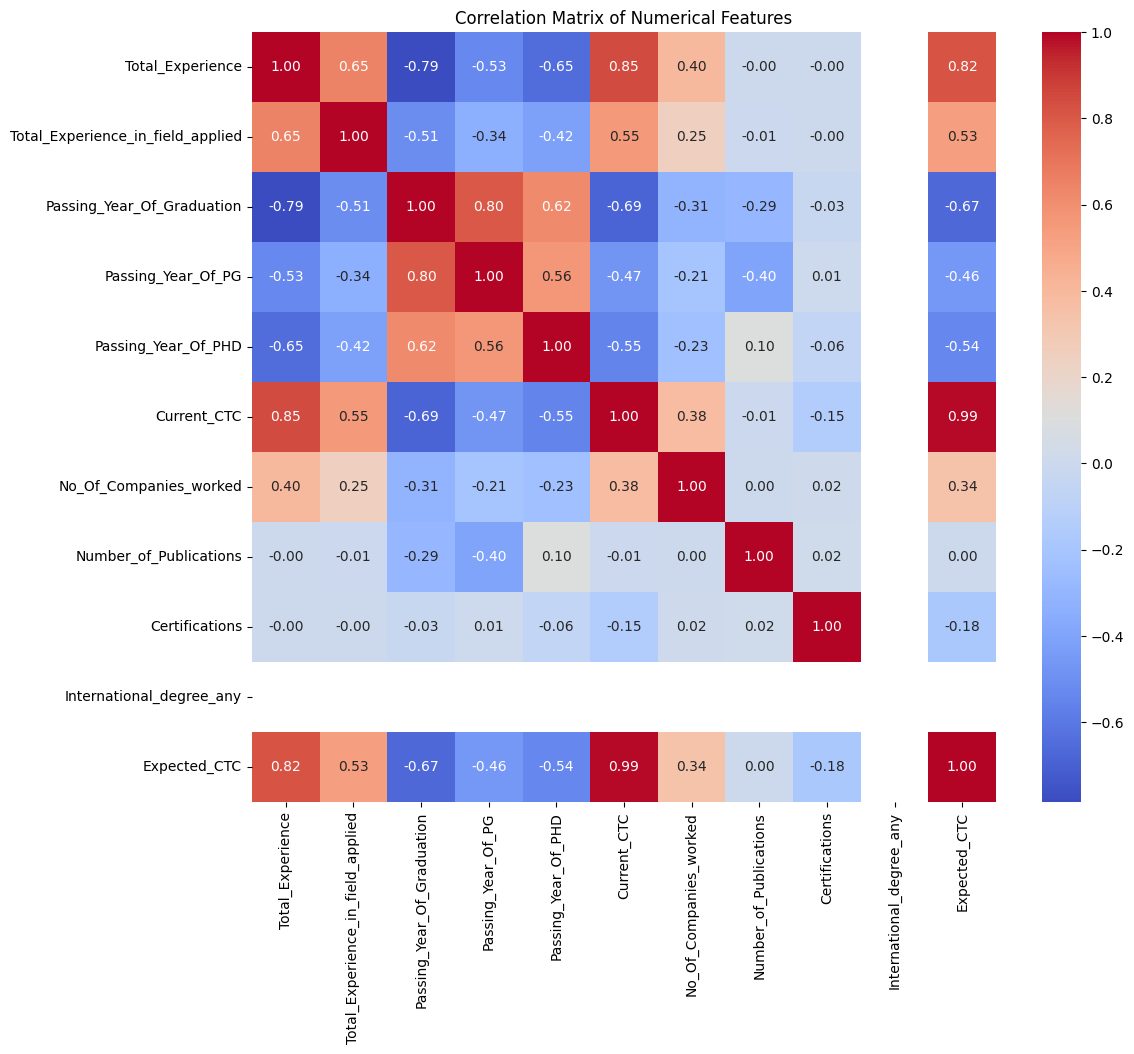

In [49]:
#Correlation Matrix

correlation_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

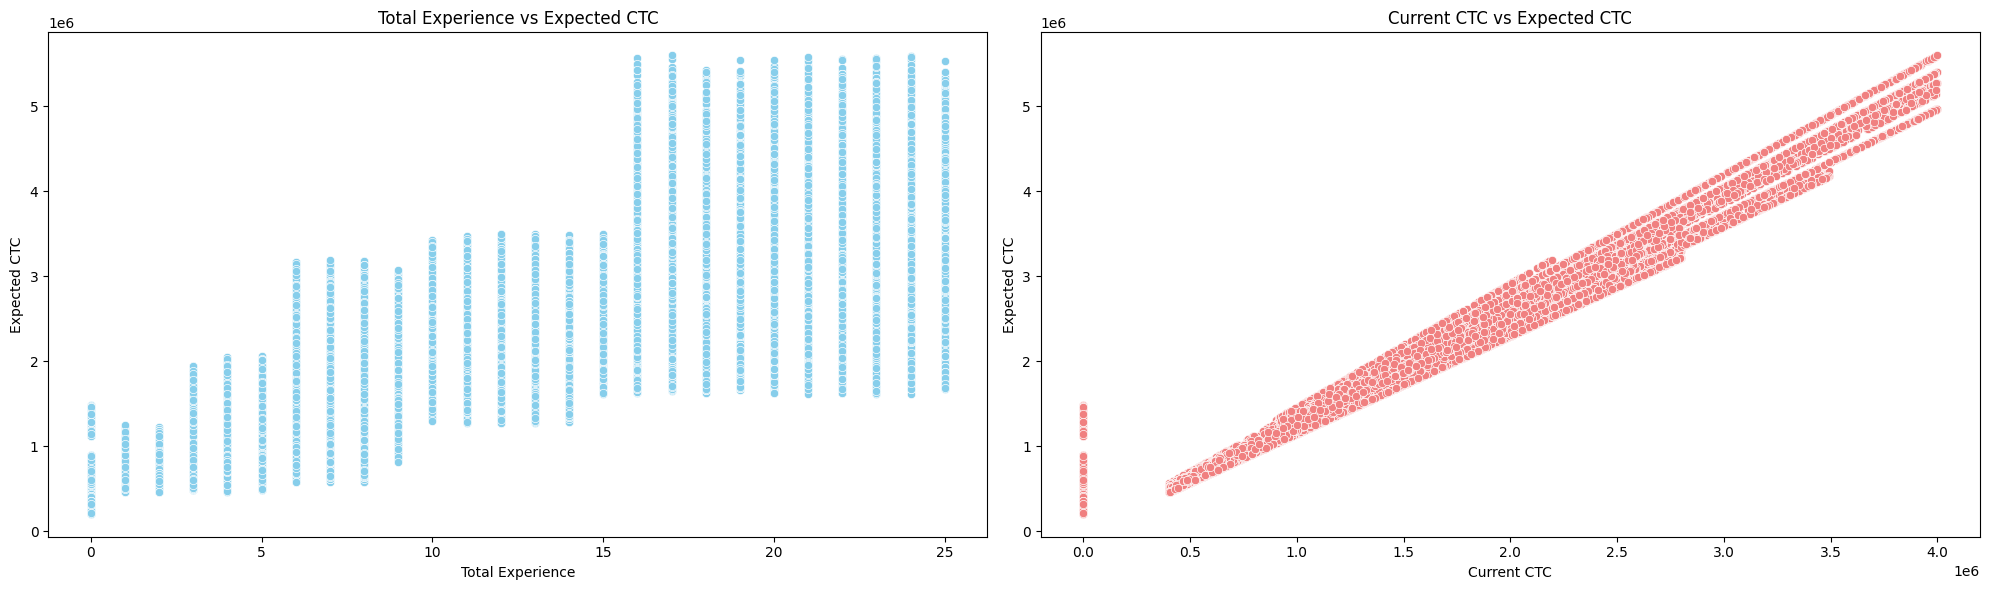

In [50]:
#Scatterplot
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Scatter plot of Total_Experience vs Expected_CTC
sns.scatterplot(x='Total_Experience', y='Expected_CTC', data=df, ax=axes[0], color='skyblue')
axes[0].set_title('Total Experience vs Expected CTC')
axes[0].set_xlabel('Total Experience')
axes[0].set_ylabel('Expected CTC')

# Scatter plot of Current_CTC vs Expected_CTC
sns.scatterplot(x='Current_CTC', y='Expected_CTC', data=df, ax=axes[1], color='lightcoral')
axes[1].set_title('Current CTC vs Expected CTC')
axes[1].set_xlabel('Current CTC')
axes[1].set_ylabel('Expected CTC')



plt.tight_layout()
plt.show()

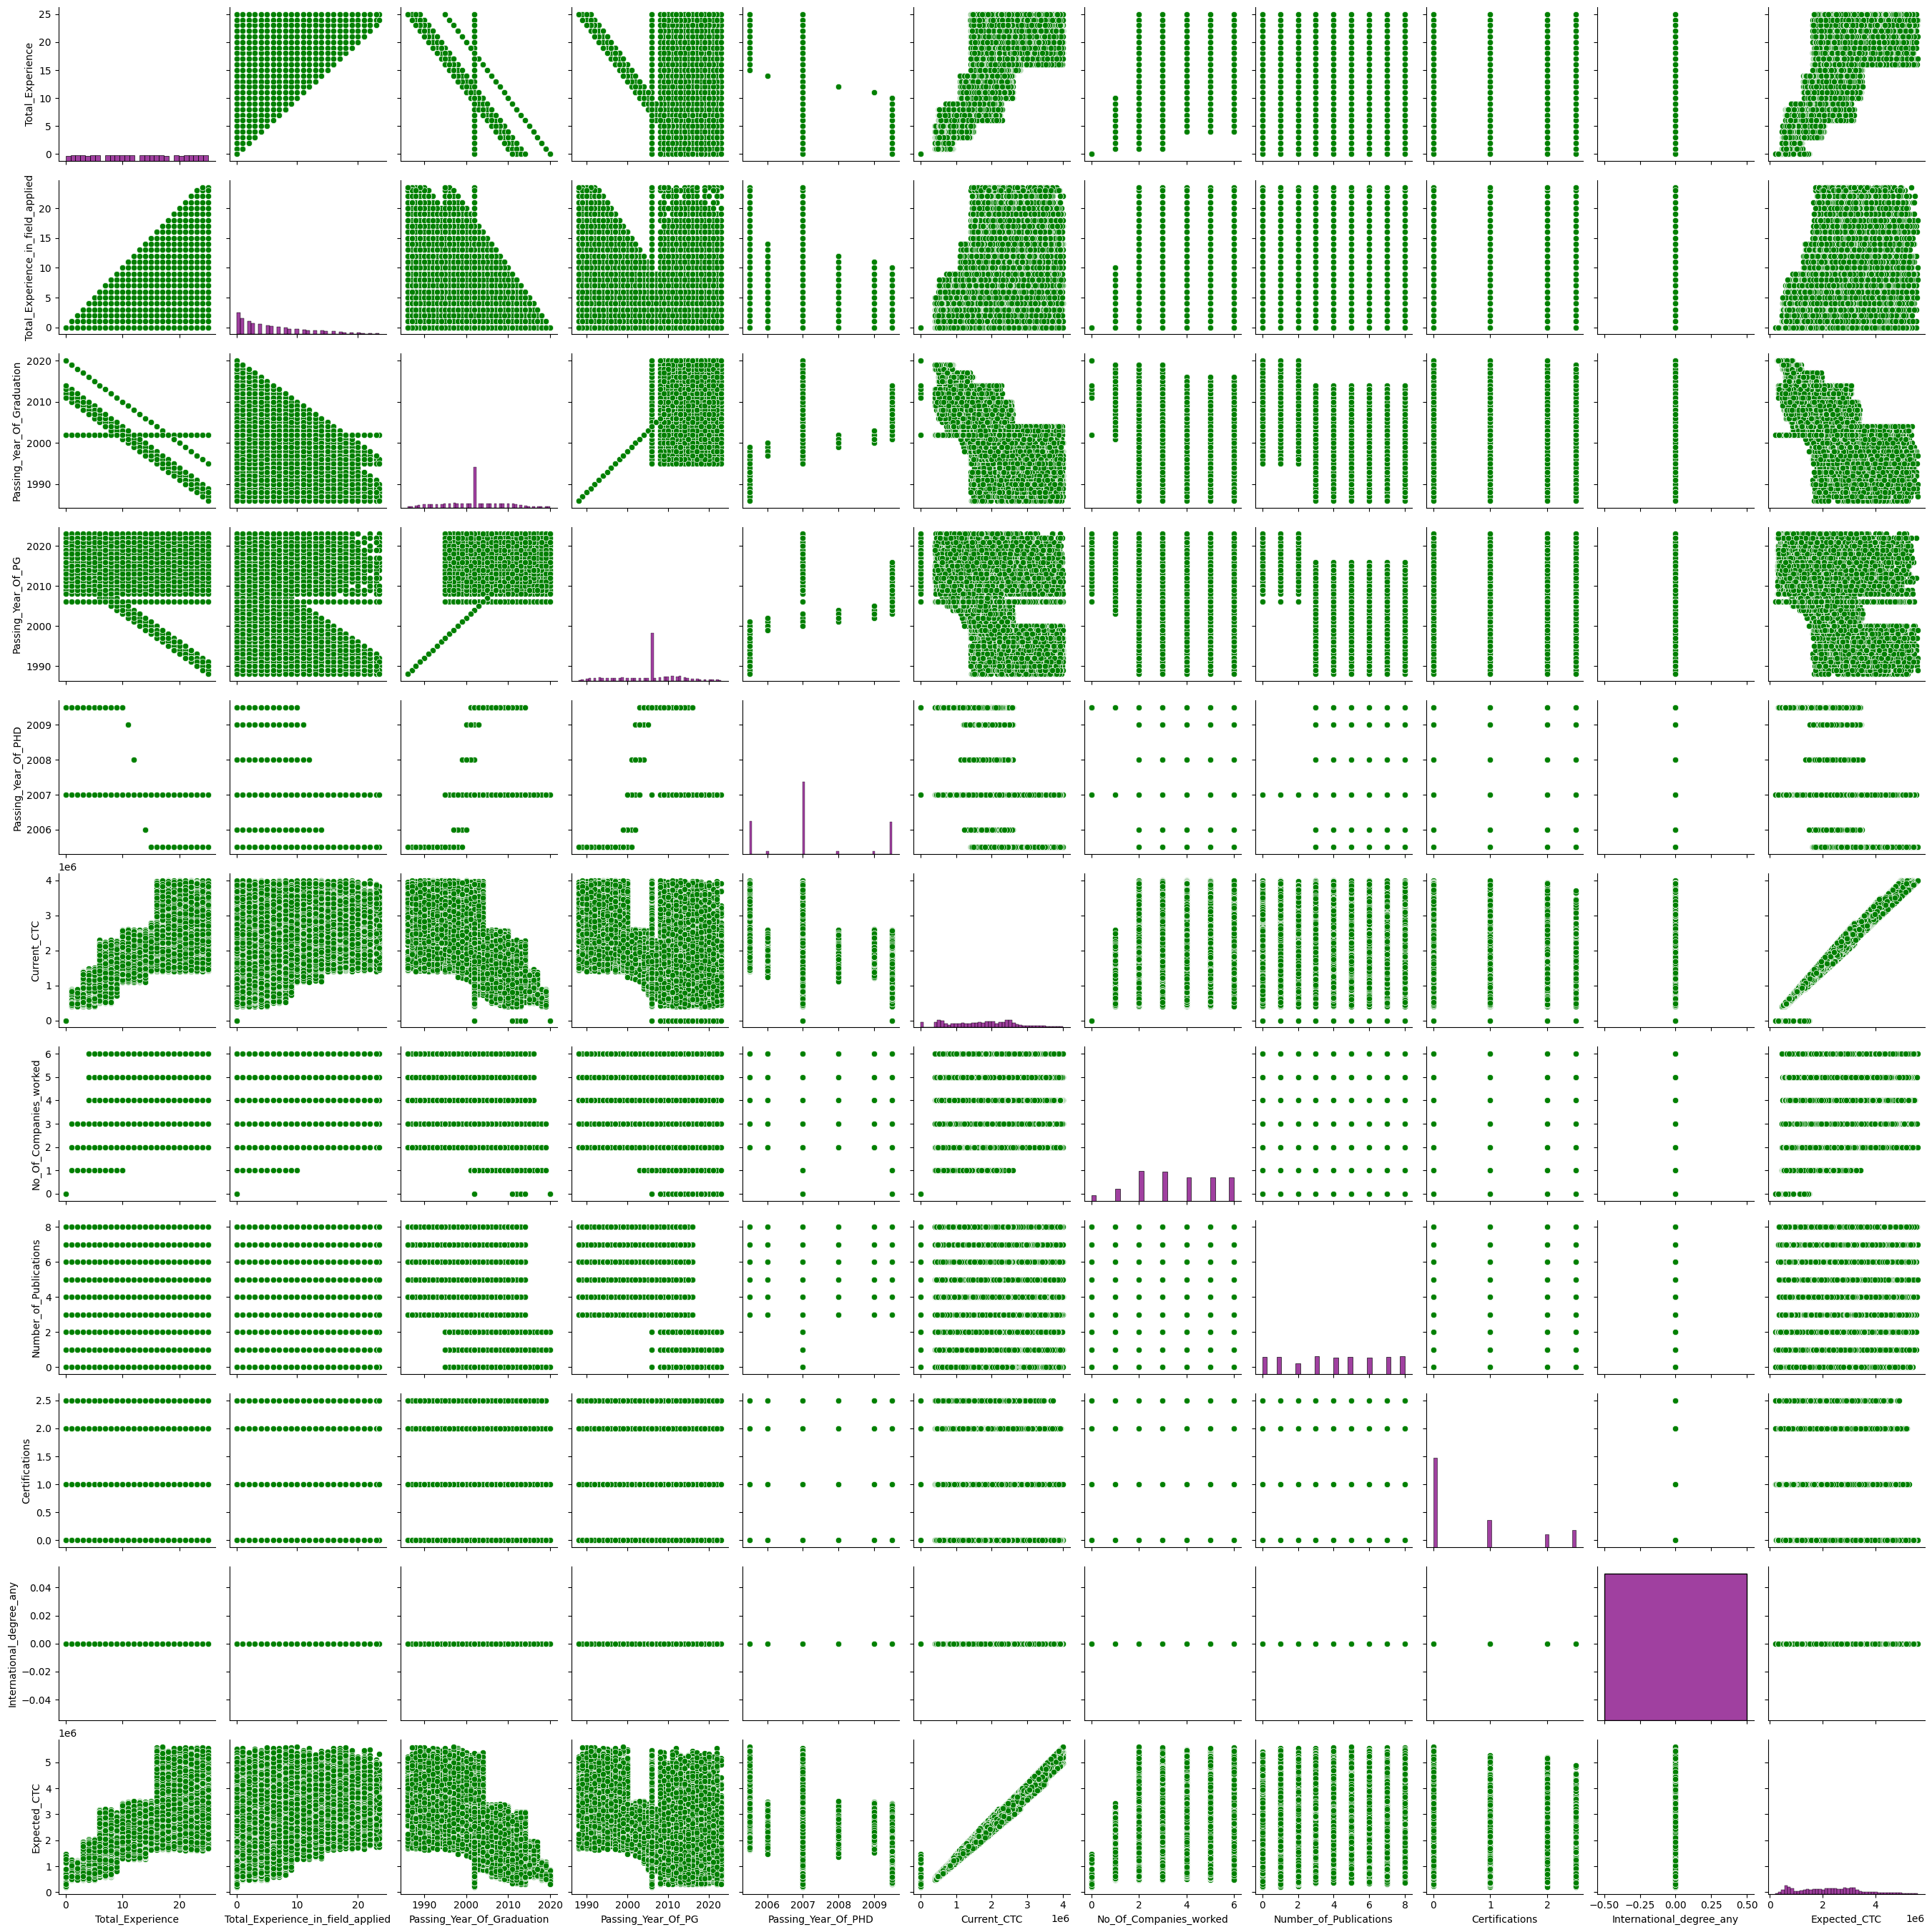

In [51]:
#Pairplot
sns.pairplot(df, plot_kws={'color': 'green'}, diag_kws={'color': 'purple'})
plt.show()

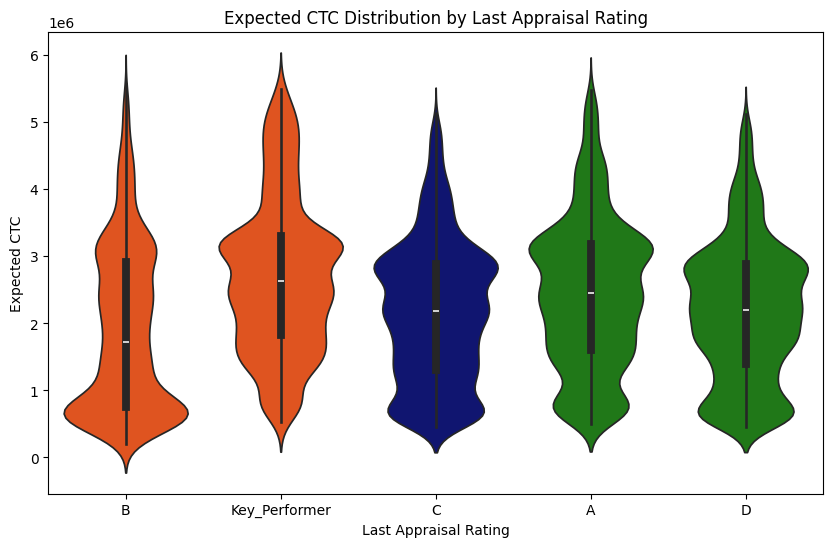

In [52]:
#Violinplot
# Define colors for the tricolor scheme
colors = ['#FF4500', '#000780', '#138808'] #Orange, Navy Blue, Green
custom_palette = [colors[0]] * 2 + [colors[1]] * 1 + [colors[2]] * 2

plt.figure(figsize=(10, 6))
sns.violinplot(x='Last_Appraisal_Rating', y='Expected_CTC', data=df, palette=custom_palette)
plt.title('Expected CTC Distribution by Last Appraisal Rating')
plt.xlabel('Last Appraisal Rating')
plt.ylabel('Expected CTC')
plt.show()

### Applying Label Encoding and Min-Max Scaling

In [53]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Apply Min-Max Scaling to numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Exclude the target variable 'Expected_CTC' from scaling
if 'Expected_CTC' in numerical_cols:
    numerical_cols.remove('Expected_CTC')

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

##Applying the Algorithm

In [54]:
from xgboost import XGBRegressor #XG Boost Regressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score # Imported metrics for regression


X = df.drop("Expected_CTC", axis=1)
y = df["Expected_CTC"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42) # Changed to XGBRegressor
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [55]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2}")

R-squared: 0.9995356798171997


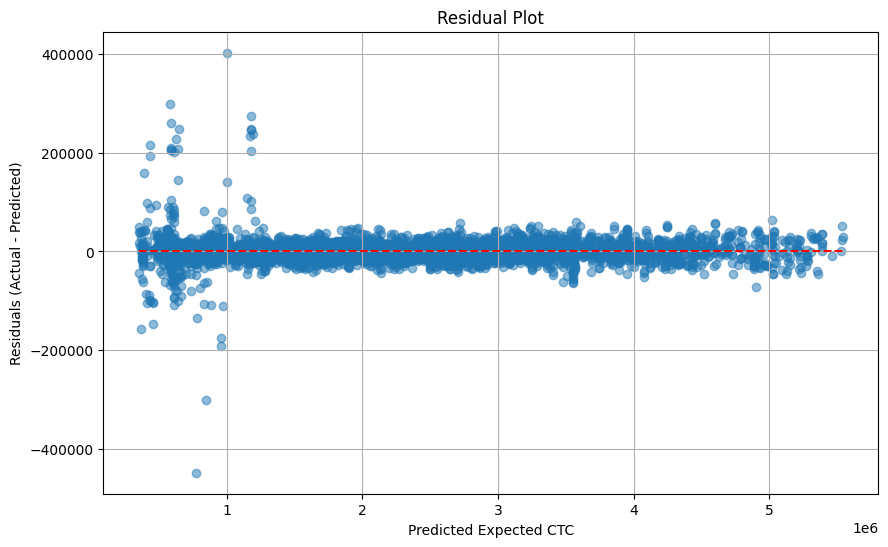

In [56]:
#Residual  Plot

residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Expected CTC")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.hlines(0, y_pred.min(), y_pred.max(), color='red', linestyle='--')
plt.grid(True)
plt.show()

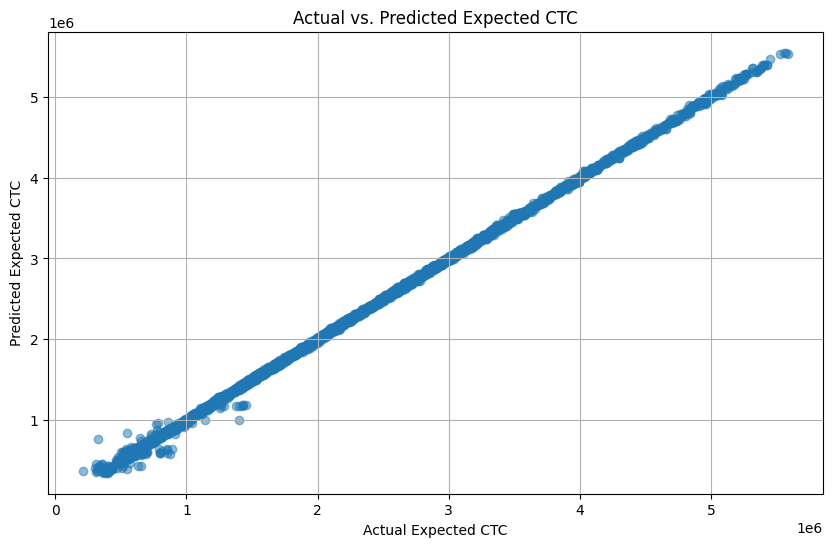

In [57]:
#Actual V/S Predicted Expected CTC

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Expected CTC")
plt.ylabel("Predicted Expected CTC")
plt.title("Actual vs. Predicted Expected CTC")
plt.grid(True)
plt.show()

In [62]:
import joblib

save_path = '/content/'

joblib.dump(model, save_path + 'xgboost_model.pkl')
joblib.dump(label_encoders, save_path + 'label_encoders.pkl')
joblib.dump(scaler, save_path + 'min_max_scaler.pkl')

print(f"Files saved successfully to {save_path}")

Files saved successfully to /content/


##**A Project by Shlok Shukla**

###* To See my other projects: [ Github](https://github.com/shlokshukla200/)

###* To Connect with me: [Linkdin](https://www.linkedin.com/in/shlokshukla200/)